# CROP RECOMMENDATION SYSTEM 

# About the data



**The data have Nitrogen, Phosphorous, Pottasium and pH values of the soil. Also, it also contains the humidity, temperature rainfall and sowing season required for a particular crop**


In [ ]:
# Importing libraries

from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import pandas as pd
import numpy as np



: 

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('CSPreco.csv', encoding = "ISO-8859-1")


In [11]:
for col in df.columns:
    print(col)

N
P
K
temperature
humidity
ph
rainfall
label
sowing season


In [45]:
grouped = df.groupby("label")
grouped.mean()["N"].plot(kind="barh")

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [27]:
df1=df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], axis=1)
df1.to_csv('CSPreco.csv',index=0)


In [12]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label,sowing season
0,90,42,43,20.880,82.003,6.503,202.936,rice,kharif
1,85,58,41,21.770,80.320,7.038,226.656,rice,kharif
2,60,55,44,23.004,82.321,7.840,263.964,rice,kharif
3,74,35,40,26.491,80.158,6.980,242.864,rice,kharif
4,78,42,42,20.130,81.605,7.628,262.717,rice,kharif
5,69,37,42,23.058,83.370,7.073,251.055,rice,kharif
6,69,55,38,22.709,82.639,5.701,271.325,rice,kharif
7,94,53,40,20.278,82.894,5.719,241.974,rice,kharif
8,89,54,38,24.516,83.535,6.685,230.446,rice,kharif
9,68,58,38,23.224,83.033,6.336,221.209,rice,kharif


In [170]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'blackgram', 'lentil',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'coconut', 'cotton', 'jute'], dtype=object)

In [171]:
#rounding to only 3 digit decimal for consistency on different paprameters
df1 = pd.DataFrame(df, columns = ['temperature', 'humidity', 'ph', 'rainfall'])

df1 = df.round(decimals = 3)

df1["sowing season"] = "kharif" 
df1.head(4)
#df1.to_csv('Crop_recommendation.csv', mode='w', index=False, header=False)

#print(df1)
df1.to_csv('CSPreco.csv')

In [29]:

df1.head(4)


,N,P,K,temperature,humidity,ph,rainfall,label,sowing season
0,90,42,43,20.880,82.003,6.503,202.936,rice,kharif
1,85,58,41,21.770,80.320,7.038,226.656,rice,kharif
2,60,55,44,23.004,82.321,7.840,263.964,rice,kharif
3,74,35,40,26.491,80.158,6.980,242.864,rice,kharif


In [175]:
##conditions = [
   # (df['label'] == 'jute'), (df['label'] == 'lentil'), (df['label'] == 'blackgram'),(df['label'] == 'watermelon'),
    #(df['label'] == 'mango'), (df['label'] == 'chickpea'), (df['label'] == 'kidneybean'), (df['label'] == 'grapes'), (df['label'] == 'orange'),
    #(df['label'] == 'papaya'), (df['label'] == 'coconut'), (df['label'] == 'cotton'), (df['label'] == 'banana'), (df['label'] == 'muskmelon'), (df['label'] == 'maize'), (df['label'] == 'rice'),
    
]

#values = ['zaid','zaid','zaid','zaid', 'rabi','rabi','rabi','rabi','rabi','kharif','kharif','kharif','kharif','kharif','kharif','kharif']

#df1['sowing season'] = np.select(conditions, values)



#df1.to_csv('CSPreco.csv')
#df1.head

<bound method NDFrame.head of       Unnamed: 0   N   P   K  temperature  humidity     ph  rainfall label  \
0              0  90  42  43       20.880    82.003  6.503   202.936  rice   
1              1  85  58  41       21.770    80.320  7.038   226.656  rice   
2              2  60  55  44       23.004    82.321  7.840   263.964  rice   
3              3  74  35  40       26.491    80.158  6.980   242.864  rice   
4              4  78  42  42       20.130    81.605  7.628   262.717  rice   
5              5  69  37  42       23.058    83.370  7.073   251.055  rice   
6              6  69  55  38       22.709    82.639  5.701   271.325  rice   
7              7  94  53  40       20.278    82.894  5.719   241.974  rice   
8              8  89  54  38       24.516    83.535  6.685   230.446  rice   
9              9  68  58  38       23.224    83.033  6.336   221.209  rice   
10            10  91  53  40       26.527    81.418  5.386   264.615  rice   
11            11  90  46  42      

In [174]:
r= df1['label']=='rice'
new_rdf= pd.DataFrame(df1[r])
print (new_rdf)


    Unnamed: 0   N   P   K  temperature  humidity     ph  rainfall label  \
0            0  90  42  43       20.880    82.003  6.503   202.936  rice   
1            1  85  58  41       21.770    80.320  7.038   226.656  rice   
2            2  60  55  44       23.004    82.321  7.840   263.964  rice   
3            3  74  35  40       26.491    80.158  6.980   242.864  rice   
4            4  78  42  42       20.130    81.605  7.628   262.717  rice   
5            5  69  37  42       23.058    83.370  7.073   251.055  rice   
6            6  69  55  38       22.709    82.639  5.701   271.325  rice   
7            7  94  53  40       20.278    82.894  5.719   241.974  rice   
8            8  89  54  38       24.516    83.535  6.685   230.446  rice   
9            9  68  58  38       23.224    83.033  6.336   221.209  rice   
10          10  91  53  40       26.527    81.418  5.386   264.615  rice   
11          11  90  46  42       23.979    81.451  7.503   250.083  rice   
12          

In [132]:
maxx= (new_rdf.max())
print(maxx)

N                    99
P                    60
K                    45
temperature       26.93
humidity         84.969
ph                7.868
rainfall         298.56
label              rice
sowing season    kharif
dtype: object


In [133]:
minn= (new_rdf.min())
print(minn)


N                     60
P                     35
K                     35
temperature       20.045
humidity          80.123
ph                 5.005
rainfall         182.562
label               rice
sowing season     kharif
dtype: object


In [134]:
dfs= [minn,maxx]
rangg = pd.concat(dfs, axis=1, join='inner')
print(rangg)


                     0       1
N                   60      99
P                   35      60
K                   35      45
temperature     20.045   26.93
humidity        80.123  84.969
ph               5.005   7.868
rainfall       182.562  298.56
label             rice    rice
sowing season   kharif  kharif


In [135]:
df1.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,sowing season
1595,87,44,43,23.875,86.793,6.719,177.515,jute,zaid
1596,88,52,39,23.929,88.071,6.880,154.661,jute,zaid
1597,90,39,37,24.814,81.687,6.861,190.789,jute,zaid
1598,90,39,43,24.447,82.286,6.769,190.968,jute,zaid
1599,84,38,43,26.574,73.820,7.262,159.322,jute,zaid


In [136]:
df1.size

14400

In [137]:
df1.shape

(1600, 9)

In [138]:
df1.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'sowing season'],
      dtype='object')

In [139]:
df1['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'blackgram', 'lentil',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'coconut', 'cotton', 'jute'], dtype=object)

In [30]:
df1.dtypes

N                  int64
P                  int64
K                  int64
temperature      float64
humidity         float64
ph               float64
rainfall         float64
label             object
sowing season     object
dtype: object

In [44]:
grouped = df.groupby("label")
grouped.mean()["N"].plot(kind="barh")

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [33]:
df1['label'].value_counts()

blackgram      100
lentil         100
jute           100
chickpea       100
orange         100
apple          100
cotton         100
kidneybeans    100
maize          100
banana         100
grapes         100
muskmelon      100
coconut        100
rice           100
watermelon     100
mango          100
Name: label, dtype: int64

In [63]:
#df3['sowing season'] = df2['sowing season'].where(df['label']=='rice', df['sowing season']=='Kharif')

In [142]:
df1.head

<bound method NDFrame.head of        N   P   K  temperature  humidity     ph  rainfall label sowing season
0     90  42  43       20.880    82.003  6.503   202.936  rice        kharif
1     85  58  41       21.770    80.320  7.038   226.656  rice        kharif
2     60  55  44       23.004    82.321  7.840   263.964  rice        kharif
3     74  35  40       26.491    80.158  6.980   242.864  rice        kharif
4     78  42  42       20.130    81.605  7.628   262.717  rice        kharif
5     69  37  42       23.058    83.370  7.073   251.055  rice        kharif
6     69  55  38       22.709    82.639  5.701   271.325  rice        kharif
7     94  53  40       20.278    82.894  5.719   241.974  rice        kharif
8     89  54  38       24.516    83.535  6.685   230.446  rice        kharif
9     68  58  38       23.224    83.033  6.336   221.209  rice        kharif
10    91  53  40       26.527    81.418  5.386   264.615  rice        kharif
11    90  46  42       23.979    81.451  7.503

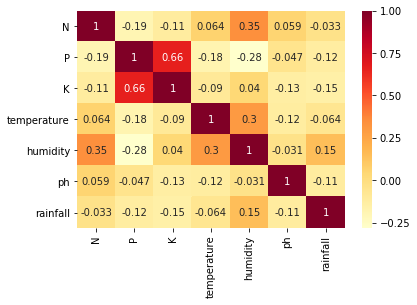

In [32]:
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd') #for correlation

### Seperating features and target label

In [13]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [14]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = [] 

In [15]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =1)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  97.77777777777777
              precision    recall  f1-score   support

      banana       0.97      1.00      0.99        33
   blackgram       1.00      1.00      1.00        32
    chickpea       1.00      0.97      0.98        29
     coconut       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        34
        jute       0.82      0.88      0.85        26
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        36
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        25
   muskmelon       0.97      1.00      0.98        31
      orange       1.00      1.00      1.00        30
        rice       0.89      0.83      0.86        30
  watermelon       1.00      0.96      0.98        25

    accuracy                           0.98       450
   macro avg       0.98      0.9

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [19]:
score

array([0.98666667, 0.98      , 0.97666667, 0.98666667, 0.96333333])

### Saving trained Decision Tree model

In [17]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [22]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.1622222222222222
              precision    recall  f1-score   support

      banana       1.00      0.09      0.17        33
   blackgram       1.00      0.03      0.06        32
    chickpea       1.00      0.14      0.24        29
     coconut       1.00      0.05      0.10        37
      cotton       0.06      1.00      0.11        24
      grapes       0.00      0.00      0.00        34
        jute       1.00      0.08      0.14        26
 kidneybeans       1.00      0.03      0.07        29
      lentil       0.00      0.00      0.00        36
       maize       1.00      0.03      0.07        29
       mango       1.00      0.40      0.57        25
   muskmelon       1.00      0.32      0.49        31
      orange       0.00      0.00      0.00        30
        rice       1.00      0.07      0.12        30
  watermelon       1.00      0.52      0.68        25

    accuracy                           0.16       450
   macro avg       0.74      0.18      0.

# Guassian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9888888888888889
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        33
   blackgram       1.00      1.00      1.00        32
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        37
      cotton       0.96      1.00      0.98        24
      grapes       1.00      1.00      1.00        34
        jute       0.87      1.00      0.93        26
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        36
       maize       1.00      0.97      0.98        29
       mango       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        30
        rice       1.00      0.87      0.93        30
  watermelon       1.00      1.00      1.00        25

    accuracy                           0.99       450
   macro avg       0.99      0.99

In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99666667, 0.99333333, 0.99333333, 0.99333333, 0.98333333])

### Saving trained Guassian Naive Bayes model

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [15]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.25333333, 0.32      , 0.33666667, 0.28      , 0.34      ])

In [24]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=3)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9622222222222222
              precision    recall  f1-score   support

      banana       0.97      1.00      0.99        33
   blackgram       0.91      0.91      0.91        32
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        37
      cotton       0.96      1.00      0.98        24
      grapes       1.00      1.00      1.00        34
        jute       0.76      0.85      0.80        26
 kidneybeans       1.00      1.00      1.00        29
      lentil       0.97      0.92      0.94        36
       maize       1.00      0.93      0.96        29
       mango       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        30
        rice       0.86      0.83      0.85        30
  watermelon       1.00      1.00      1.00        25

    accuracy                           0.96       450
   macro avg       0.96  

# Logistic Regression

In [25]:
import lightgbm as lgb
lgbm=lgb.LGBMClassifier(max_depth=6)
lgbm.fit(Xtrain,Ytrain)

predicted_values = lgbm.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('LightGBM')
print("LightGBM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [17]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.97333333, 0.96333333, 0.98      , 0.96666667, 0.93333333])

### Saving trained Logistic Regression model

In [25]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=30, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9933333333333333
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        33
   blackgram       1.00      1.00      1.00        32
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        34
        jute       0.90      1.00      0.95        26
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        36
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        30
        rice       1.00      0.90      0.95        30
  watermelon       1.00      1.00      1.00        25

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.9

In [19]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99      , 0.99666667, 0.99666667, 0.99333333, 0.98      ])

### Saving trained Random Forest model

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# KNN

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.3,random_state =0)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9844444444444445
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        32
   blackgram       1.00      1.00      1.00        38
    chickpea       1.00      1.00      1.00        27
     coconut       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        37
      grapes       1.00      1.00      1.00        25
        jute       0.88      0.91      0.89        32
 kidneybeans       1.00      1.00      1.00        25
      lentil       1.00      1.00      1.00        34
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        35
        rice       0.91      0.88      0.89        33
  watermelon       1.00      1.00      1.00        33

    accuracy                           0.98       450
   macro avg       0.99      0.99      0.99

In [22]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.98       0.98333333 0.97666667 0.97666667 0.97333333]


In [26]:
! pip install xgboost

In [30]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,sowing season
0,90,42,43,20.880,82.003,6.503,202.936,rice,kharif
1,85,58,41,21.770,80.320,7.038,226.656,rice,kharif
2,60,55,44,23.004,82.321,7.840,263.964,rice,kharif
3,74,35,40,26.491,80.158,6.980,242.864,rice,kharif
4,78,42,42,20.130,81.605,7.628,262.717,rice,kharif


In [37]:
!pip install catboost

In [39]:
from catboost import CatBoostClassifier 
catB=CatBoostClassifier(verbose=False)

catB.fit(Xtrain,Ytrain)


predicted_values = catB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Catboost')
print("CatBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

CatBoost's Accuracy is:  0.9888888888888889
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        33
   blackgram       1.00      1.00      1.00        32
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        34
        jute       0.84      1.00      0.91        26
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        36
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        30
        rice       1.00      0.83      0.91        30
  watermelon       1.00      1.00      1.00        25

    accuracy                           0.99       450
   macro avg       0.99      0.99   

In [41]:
//** LINEAR SVC**//

SyntaxError: invalid syntax (<ipython-input-41-3eb19d8a33c7>, line 1)

In [29]:
from sklearn.svm import LinearSVC

Linearsvc=LinearSVC(C=2)
Linearsvc.fit(Xtrain,Ytrain)

predicted_values = Linearsvc.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('LinearSVC')
print("LinearSVC's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

LinearSVC's Accuracy is:  0.7333333333333333
              precision    recall  f1-score   support

      banana       0.97      0.97      0.97        33
   blackgram       1.00      0.72      0.84        32
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      0.49      0.65        37
      cotton       0.77      0.96      0.85        24
      grapes       1.00      0.97      0.99        34
        jute       0.00      0.00      0.00        26
 kidneybeans       1.00      1.00      1.00        29
      lentil       0.86      1.00      0.92        36
       maize       0.00      0.00      0.00        29
       mango       1.00      1.00      1.00        25
   muskmelon       1.00      0.58      0.73        31
      orange       1.00      1.00      1.00        30
        rice       1.00      0.30      0.46        30
  watermelon       0.20      1.00      0.34        25

    accuracy                           0.73       450
   macro avg       0.79      0.73  

In [45]:
!pip install lightgbm

In [2]:
!pip install keras

In [5]:
!pip install tensorflow

  Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Found existing installation: Werkzeug 0.15.4
    Uninstalling Werkzeug-0.15.4:
      Successfully uninstalled Werkzeug-0.15.4
  Found existing installation: importlib-metadata 0.17
    Uninstalling importlib-metadata-0.17:
      Successfully uninstalled importlib-metadata-0.17
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [35]:
num_classes = len(set(Ytrain))


TypeError: unhashable type: 'numpy.ndarray'

In [34]:
from keras.utils import to_categorical

Ytrain = to_categorical(Ytrain, num_classes=num_classes)
Ytest = to_categorical(Ytest, num_classes=num_classes)


NameError: name 'num_classes' is not defined

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Convert categorical labels to integer labels
label_encoder = LabelEncoder()
Ytrain = label_encoder.fit_transform(Ytrain)
Ytest = label_encoder.transform(Ytest)

# Convert integer labels to one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
Ytrain = np.expand_dims(Ytrain, axis=1)
Ytest = np.expand_dims(Ytest, axis=1)
Ytrain = onehot_encoder.fit_transform(Ytrain)
Ytest = onehot_encoder.transform(Ytest)


ValueError: bad input shape (1050, 15)

In [42]:
import pandas as pd
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=Xtrain.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(Xtrain, Ytrain, epochs=10, batch_size=32)

# Predict on the test data
predicted_values = model.predict(Xtest)
predicted_values = (predicted_values > 0.5).astype(int)

# Evaluate the model
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('ANN')
print("ANN's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))


Epoch 1/10


ValueError: in user code:

    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\engine\training.py", line 1083, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\backend.py", line 5681, in binary_crossentropy
        labels=target, logits=output

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 15)).


In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')



NameError: name 'sequences' is not defined

In [38]:
# Import required libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import pad_sequences

# Reshape the input data for RNN
Xtrain = pad_sequences(Xtrain, maxlen=maxlen, padding='post')
Xtest = pad_sequences(Xtest, maxlen=maxlen, padding='post')

# Define the RNN model
model = Sequential()
model.add(LSTM(32, input_shape=(maxlen, input_dim)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(Xtrain, Ytrain, epochs=10, batch_size=32, verbose=0)

# Make predictions on the test set
predicted_values = model.predict_classes(Xtest)

# Compute accuracy score
from sklearn import metrics
accuracy_score = metrics.accuracy_score(Ytest, predicted_values)
print("RNN's Accuracy is:", accuracy_score)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(Ytest, predicted_values))


ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (C:\Users\Anishka Chauhan\Anaconda3\lib\site-packages\keras\preprocessing\sequence.py)

## Accuracy Comparison

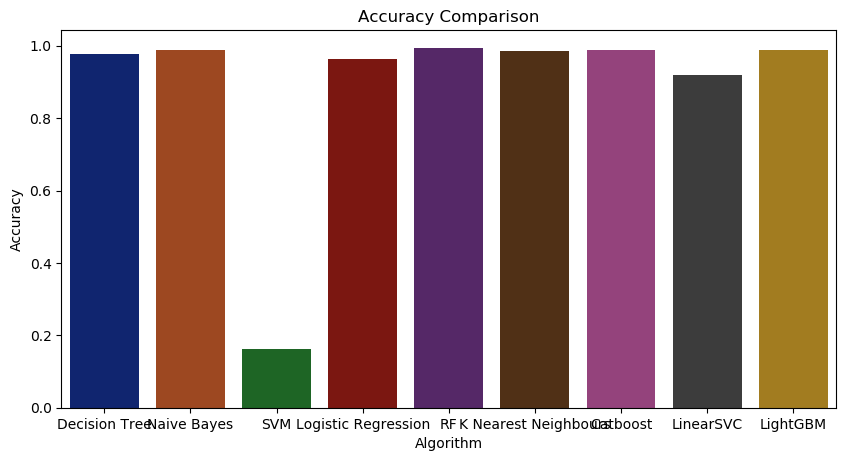

In [49]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
bp=sns.barplot(x = model,y = acc,palette='dark')


In [41]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, ':', v)

Decision Tree : 0.9777777777777777
Naive Bayes : 0.9888888888888889
SVM : 0.1622222222222222
Logistic Regression : 0.9622222222222222
RF : 0.9933333333333333
K Nearest Neighbours : 0.9844444444444445
Catboost : 0.9888888888888889


## Making a prediction


In [50]:
data = np.array([[112,28, 31, 33.703, 58.3, 5.9, 138.78]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [51]:
data = np.array([[158, 75, 87, 34, 69.3, 6.0, 145.93]])
prediction = RF.predict(data)
print(prediction)

['banana']


import warnings
warnings.filterwarnings('ignore')